<a href="https://colab.research.google.com/github/osamasherif22/Image-Segmentation/blob/master/PR_Ass_2_Image_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone the git hub 
# to add the dataset in the 
#VR files
!git clone https://github.com/osamasherif22/Image-Segmentation

Cloning into 'Image-Segmentation'...
remote: Enumerating objects: 1233, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 1233 (delta 58), reused 8 (delta 3), pack-reused 1128
Receiving objects: 100% (1233/1233), 66.68 MiB | 30.20 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from google.colab.patches import cv2_imshow
from scipy import io
import scipy
import imageio

# KMEANS

In [3]:
import math; #For pow and sqrt
import sys;
from random import shuffle, uniform;
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import itertools
import random


def FindNearshCentroid(means,item):
    
    minimum = sys.maxsize
    index = -1;

    for i in range(len(means)):
        #Ecludean distance
        dis = np.linalg.norm(item-means[i])

        if(dis < minimum):
            minimum = dis;
            index = i;
    
    return index;


def UpdateCentroids(clusters_data, items, centroids):

    for i in range( len(clusters_data) ):
        new_centroid_sum_x = 0
        new_centroid_sum_y = 0
        for j in range( len(clusters_data[i]) ):
            index = clusters_data[i][j]
            new_centroid_sum_x += items[index][0]
            new_centroid_sum_y += items[index][1]
        #centroids[i][0] = new_centroid_sum_x/float(j+1)
        #centroids[i][1] = new_centroid_sum_y/float(j+1)
        centroids[i][0] = new_centroid_sum_x/float(len(centroids))
        centroids[i][1] = new_centroid_sum_y/float(len(centroids))
    return centroids



def groupToCentroid(centroids,items):
    clusters_size = [0 for i in range(len(centroids))]
    clusters_data = [[] for i in range(len(centroids))]; #Init clusters
    for i in range(len(items)):
        item = items[i];           
        centroid_index = FindNearshCentroid(centroids,item);
        clusters_size[centroid_index] += 1;
        clusters_data[centroid_index].append(i)
    return clusters_data, clusters_size

def initializeCentroids(k,items):
    # print("ok")
    # centroids = []
    # while(len(centroids)!=k):
    #     cent = items[random.sample(range(0, len(items)), k)]
    #     if(len(centroids)>=1):
    #         if(cent not in centroids):
    #             centroids.append(cent)
    #         else:
    #             centroids.append(cent)
    # print("Initial centroids are {}".format(centroids))
    # return cent





     centroids = [[0 for i in range(len(items[0]))] for j in range(k)] #Init centroids array
     centroids = np.array(centroids)
     #randomIndexes = random.sample(range(0, len(items)), k)
     centroids = random.sample(list(items), k)

     # for i in range(len(randomIndexes)):
     #   #print(centroids.shape)
     #   #print(items.shape)
     #   centroids[i] = items[randomIndexes[i]]
     return centroids

def KMeans(k,items):

    iterations = 0
    converge_counter = 0
    # initialize centroids
    centroids = [[] for i in range(k)]
    centroids = np.array(centroids)
    centroids = initializeCentroids(k,items)
    print("CENTROIDS",centroids)
    old_centroids = [[] for i in range(len(centroids))]; 
    old_centroids = np.array(old_centroids)
    while np.array_equal(old_centroids, centroids) != True :
      
      converge_counter = converge_counter + 1
      clusters_data , clusters_size = groupToCentroid(centroids, items)
      old_centroids = np.copy(centroids)
      centroids = UpdateCentroids(clusters_data, items, centroids) 
      #print("old centroids  = ", old_centroids)
      #print("new centroids  = ", centroids)


      colors = itertools.cycle(["r", "b", "g", "c" , "m" , "y"])
      fig = plt.figure(figsize=(10, 10))
      for i in range(len(clusters_data)):

        item_index_array = clusters_data[i]
        point_color = next(colors)
        #for j in item_index_array:
          
          #plt.scatter(items[j][0], items[j][1], color = point_color)
          
      plt.show()

      print("CLUSTERS ---------------------------------",clusters_data)
      return clusters_data

# Load the data set and Display func

In [4]:
def get_sorted_list_filenm(path,ext):
  # Get list of all files in a given directory sorted by name
  sorted_list_of_files = sorted( filter( os.path.isfile,
                          glob(path + ext) ) )
  return sorted_list_of_files

In [5]:
# Read all the jpg image in directory
def load_image(image_path):
    arr_imgs=[]
    original_imgs = []
    files_name_sorted=get_sorted_list_filenm(image_path,"/*jpg")
    for file in files_name_sorted:
        pic = cv2.imread(file).astype(np.float32)
        pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
        shape = pic.shape
        original_imgs.append(pic)
        arr_imgs.append(np.float32(pic.reshape(-1, pic.shape[-1])))
    arr_imgs = np.array(arr_imgs) # Convert to np array
    display_img(arr_imgs[0],original_imgs[0])
    return arr_imgs,original_imgs

In [6]:
# display Ground truth imge
def display_GT (image):
  # Output img with window name as 'image'
  cv2_imshow(image)  
  # Maintain output window utill
  # user presses a key
  cv2.waitKey(0)
  

# display imges 
def display_img (image,origin_img):
  # Output img with window name as 'image'
  cv2_imshow(image.reshape(origin_img.shape))  
  # Maintain output window utill
  # user presses a key
  cv2.waitKey(0)      

In [23]:
# Read Ground truth files
root = '/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/'

def load_ground(root,groundtest_arr,groundtrain_arr,groundval_arr,version):
  PATH = os.path.join(root,'data/groundTruth')
  for sub_dir_name in ['train/','test/','val/']:
      temp_arr=[]
      sub_pth = os.path.join(PATH,sub_dir_name)
      ##Create a new folder for the generated pictures to save
      save_pth = os.path.join(root,'data/GT_convert',sub_dir_name)
      os.makedirs(save_pth,exist_ok=True)
      sorted_sub_pth=get_sorted_list_filenm(sub_pth,"/*mat")
      for filename in sorted_sub_pth:
          # Read all data in the mat file
          #mat file contains data stored in dictionary form
          #Include dict_keys(['__globals__','groundTruth','__header__','__version__'])
          #If you want to use the contour in'groundTruth']
          #x['groundTruth'][0][0][0][0][1] is the outline
          #x['groundTruth'][0][0][0][0][0] is the segmentation map
          data = io.loadmat(os.path.join(sub_pth,filename))
          edge_data = data['groundTruth'][0][0][0][0][version]
          if ( version == 1 ):
            #Store the normalized data: 0<x<1
            #So need to restore back to 0<x<255
            edge_data_255 = edge_data * 255
            temp_arr.append(edge_data_255)
          else:
            temp_arr.append(edge_data)
      if (sub_dir_name=='train/' ):
        print(sub_dir_name)
        groundtrain_arr= temp_arr.copy()
      elif (sub_dir_name=='test/' ):
        print(sub_dir_name)
        groundtest_arr= temp_arr.copy()
      else:
        print(sub_dir_name)
        groundval_arr= temp_arr.copy()


  return (groundtest_arr,groundtrain_arr,groundval_arr)



# MAIN CALLS

**read the data set**

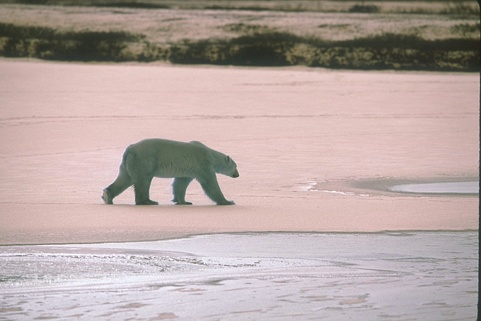

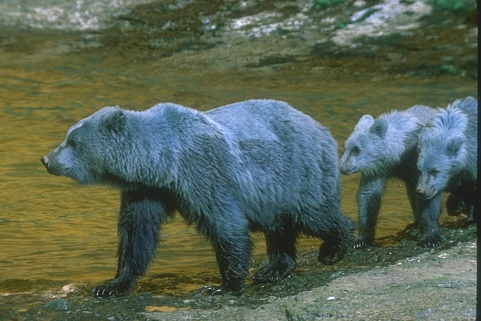

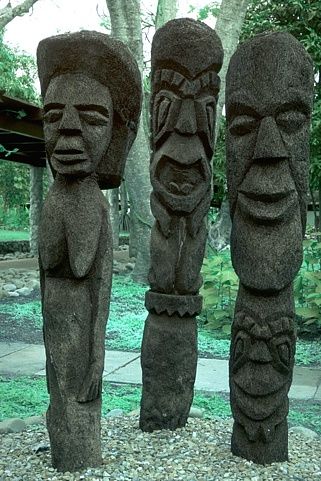

In [8]:
base='/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/'

#load test data set
test_imgs,test_imgs_origin=load_image(base+'test/')

#load train data set
train_imgs,train_imgs_origin=load_image(base+'train/')


#load val data set
val_imgs,val_imgs_origin=load_image(base+'val/')

**Display mat file**

In [16]:
np.set_printoptions(threshold=100)
#np.set_printoptions(threshold=sys.maxsize)
root ='/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/groundTruth/'
file_name='train/100075.mat'
# read a file 
x=io.loadmat(root+file_name)

print("\n outline imges ( Boundries )\n",x['groundTruth'][0][0][0][0][1])

print("\n Segmentation\n",x['groundTruth'][0][0][0][0][0])

print(x.keys())


 outline imges ( Boundries )
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 Segmentation
 [[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [11 11 11 ... 14 14 14]
 [11 11 11 ... 14 14 14]
 [11 11 11 ... 14 14 14]]
dict_keys(['__header__', '__version__', '__globals__', 'groundTruth'])


**Load segmentation map and outline imges**

In [24]:
#load outline imgs ( Boundries )
#version = 1

boundriesTest_arr=[]
boundriesTrain_arr=[]
boundriesVal_arr=[]
boundriesTest_arr,boundriesTrain_arr,boundriesVal_arr=load_ground(root,boundriesTest_arr,boundriesTrain_arr,boundriesVal_arr,1)
print(np.array(boundriesTrain_arr).shape)

#load segmentation map
#version = 0 

segmentationTest_arr=[]
segmentationTrain_arr=[]
segmentationVal_arr=[]
segmentationTest_arr,segmentationTrain_arr,segmentationVal_arr=load_ground(root,segmentationTest_arr,segmentationTrain_arr,segmentationVal_arr,0)

train/
test/
val/
(200,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


train/
test/
val/


**Q2. Visualize the image and the ground truth segmentation**

Ground Truth img


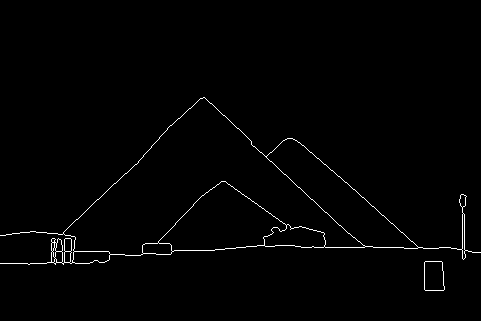

img


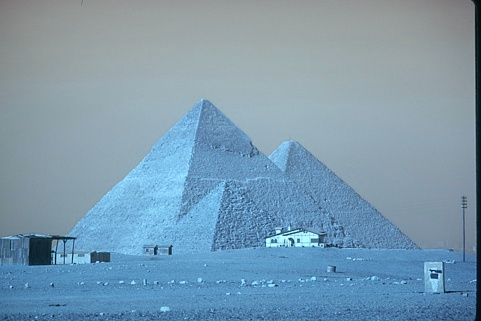

In [25]:
print("Ground Truth img")
display_GT(np.array(boundriesTrain_arr[50]))

print("img")
display_img(train_imgs[50],train_imgs_origin[50])

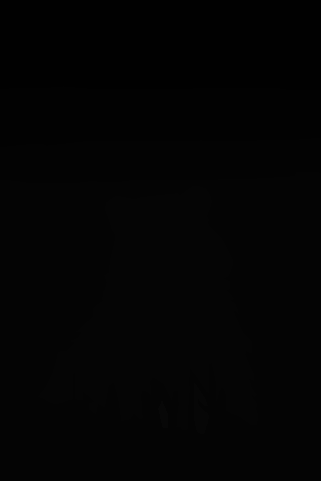

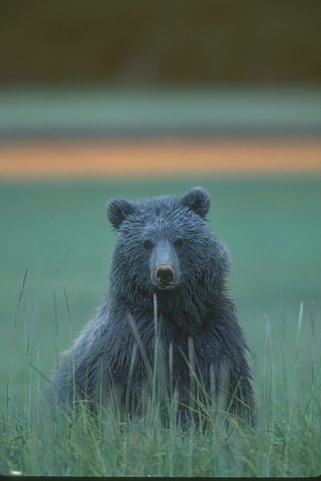

In [31]:
sample_no = 1

sample_image = train_imgs[sample_no]
sample_image_origin  =train_imgs_origin[sample_no]
sample_segmentation= segmentationTrain_arr[sample_no]

display_GT(np.array(sample_segmentation))

display_img(sample_image,sample_image_origin)


**Apply our K means**

CENTROIDS [array([255.,   0., 127.], dtype=float32), array([  0.,   0., 255.], dtype=float32), array([  0.,   0., 255.], dtype=float32), array([  0.,   0., 255.], dtype=float32), array([255.,   0., 255.], dtype=float32), array([128., 128., 128.], dtype=float32), array([128., 128., 128.], dtype=float32), array([255.,   0., 127.], dtype=float32), array([255.,   0., 255.], dtype=float32)]


<Figure size 720x720 with 0 Axes>

CLUSTERS --------------------------------- [[14865, 25498, 25499, 25811, 25812, 25814, 25815, 25816, 25817, 25820, 25821, 25822, 26126, 26127, 26128, 26129, 26130, 26131, 26132, 26133, 26134, 26135, 26136, 26137, 26138, 26139, 26140, 26141, 26142, 26143, 26144, 26145, 26146, 26147, 26444, 26445, 26446, 26447, 26448, 26449, 26450, 26451, 26452, 26453, 26454, 26455, 26456, 26457, 26458, 26459, 26460, 26461, 26462, 26463, 26464, 26465, 26466, 26467, 26468, 26469, 26470, 26471, 26472, 26473, 26762, 26763, 26764, 26765, 26766, 26767, 26768, 26769, 26770, 26771, 26772, 26773, 26774, 26775, 26776, 26777, 26778, 26779, 26780, 26781, 26782, 26783, 26784, 26785, 26786, 26787, 26788, 26789, 26790, 26791, 26792, 26793, 26794, 26795, 26796, 26798, 27074, 27075, 27076, 27077, 27078, 27079, 27080, 27081, 27082, 27083, 27084, 27085, 27086, 27087, 27088, 27089, 27090, 27091, 27092, 27093, 27094, 27095, 27096, 27097, 27098, 27099, 27100, 27101, 27102, 27103, 27104, 27105, 27106, 27107, 27108, 27109, 271

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


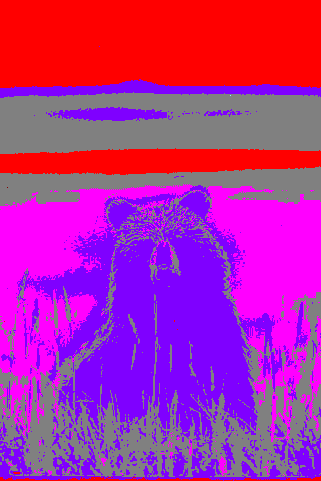


Clusters :
(9,)
44309
35060
0
0
28835
46197
0
0
0


In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import v_measure_score

clusters_data = KMeans(9,sample_image) #00
clusters_data = np.array(clusters_data)

display_img(sample_image,sample_image_origin)





    
print("\nClusters :" )
print(clusters_data.shape)
print(len(clusters_data[0]))
print(len(clusters_data[1]))
print(len(clusters_data[2]))
print(len(clusters_data[3]))
print(len(clusters_data[4]))
print(len(clusters_data[5]))
print(len(clusters_data[6]))
print(len(clusters_data[7]))
print(len(clusters_data[8]))

**Evaluate the results (F-measure, Conditional Entropy)**

In [40]:
grey = [128 ,128, 128]
pink = [255, 0 ,127]
viola = [255, 0 ,255]
blue = [0, 0 ,255]
green = [0, 255 ,127]
yellow = [255, 255, 0]
orange = [255, 128, 0]
red = [255, 0, 0]
purple = [127, 0 ,255]
palette = [grey ,pink, viola ,blue ,green ,yellow, orange ,red ,purple]


#deleting the first two columns of each index
kkkk =  np.delete(sample_image, 2, 1)
new =  np.delete(kkkk, 1, 1)



for i in range(len(clusters_data)):
  for j in range(len(clusters_data[i])):
    index = clusters_data[i][j]
    new[index] = i



y_true= np.array(sample_segmentation).flatten()
y_pred= np.array(new).flatten()



f1= f1_score(y_true, y_pred, average='weighted')
print("####### Fl score = ",f1)


entropy=v_measure_score(y_true,y_pred )
print("####### Conditional entropy score = ",entropy)

for i in range(len(clusters_data)):
  for j in range(len(clusters_data[i])):
    index = clusters_data[i][j]
    sample_image [index] = palette[i]






####### Fl score =  0.028103531712589974
####### Conditional entropy score =  0.46651839965537595
